## Calculating model errors

What is the error (predicted - actual) for the following network when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.

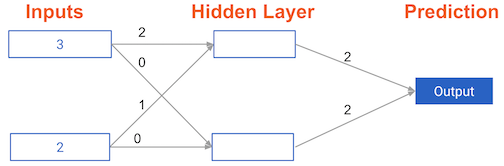

The network generates a prediction of 16, which results in an error of 11.

## Coding how weight changes affect accuracy

Now we'll get to change weights in a real network and see how they affect model accuracy!

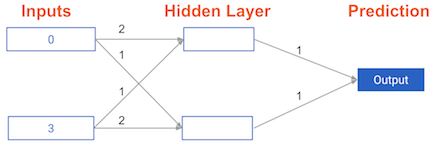



Its weights have been pre-loaded as weights_0. Our task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3). 

In [49]:
import numpy as np
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0,input)
    
    # Return the value just calculated
    return(output)
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer =(hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


In [50]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2,1],
             'node_1': [1,0],
             'output': [1,1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


## Scaling up to multiple data points

We've seen how different weights will have different accuracies on a single prediction. But usually, we'll want to measure model accuracy on many points. We'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

Here,We'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

We'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [51]:
input_data=np.array([np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])])
weights_0={'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1={'node_0': np.array([2, 1]),
 'node_1': np.array([ 1. ,  1.5]),
 'output': np.array([ 1. ,  1.5])}

In [52]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))
target_actuals=[1, 3, 5, 7]
print(target_actuals)
print(model_output_0)
# Calculate the mean squared error for model_output_0: mse_0
mse_0 =mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 =mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


[1, 3, 5, 7]
[9, 9, 0, 12]
Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Gradient Descent

## Calculating slopes

We're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what we want. 


We're ready to write the code to calculate this slope while using a single data point. We'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target we want to predict is stored in target.

In [47]:
weights=np.array([0, 2, 1])
input_data=np.array([1, 2, 3])
target=0
# Calculate the predictions: preds
preds =(weights*input_data).sum()
print(preds)
# Calculate the error: error
error = preds-target

# Calculate the slope: slope
slope = 2 *input_data*error
# Print the slope
print(slope)


7
[14 28 42]


## Improving model weights

We've just calculated the slopes we need. Now it's time to use those slopes to improve y\our model. If we add the slopes to our weights, we will move in the right direction. However, it's possible to move too far in that direction. So we will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [48]:
# Set the learning rate: learning_rate

learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated =(weights-(learning_rate*slope))

# Get updated predictions: preds_updated
preds_updated = (weights_updated*input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated-target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


Updating the model weights did indeed decrease the error!

We're now going to make multiple updates so we can dramatically improve our model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded. 

25.4016
13.16818944
6.8263894057
3.53880026791
1.83451405889
0.951012088127
0.493004666485
0.255573619106
0.132489364144
0.0686824863725
0.0356050009355
0.018457632485
0.0095684366802
0.00496027757502
0.00257140789489
0.00133301785271
0.000691036454845
0.000358233298192
0.000185708141783
9.62711007001e-05


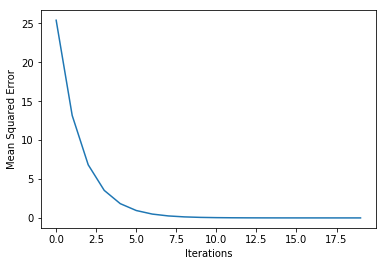

In [41]:
import matplotlib.pyplot as plt
def get_slope(input_data, target, weights):
    preds =(weights*input_data).sum()
    # Calculate the error: error
    error = preds-target
    # Calculate the slope: slope
    slope = 2 *input_data*error
    # Print the slope
    return(slope)
    
def get_mse(input_data, target, weights):
    model_output=(weights*input_data).sum()
    return mean_squared_error(list([target]),list([model_output]))
    
n_updates = 20
mse_hist = []
weights=np.array([0, 2, 1])
input_data=np.array([1, 2, 3])
target=0
# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    print(mse)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


# Round of backpropagation

In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

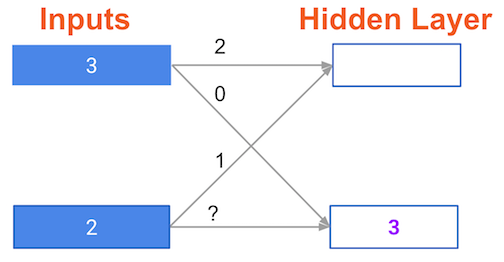

What is the slope needed to update the weight with the question mark?

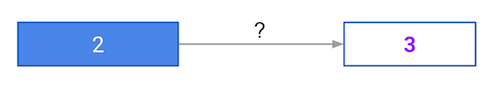

The slope needed to update this weight is indeed 6

In [39]:
x=1
mean_squared_error(list([x]),list([2]))

1.0